<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [MNIST1] - Simple classification with DNN
<!-- DESC --> An example of classification using a dense neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('MNIST1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.6
Notebook id          : MNIST1
Run time             : Tuesday 26 January 2021, 16:11:26
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/tmp/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [3]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255


After normalization  : Min=0.0, max=1.0


### Have a look

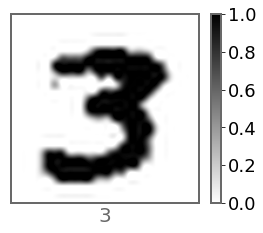

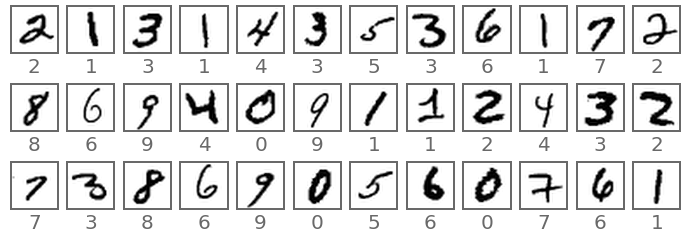

In [4]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 5 - Train the model

In [6]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16


  1/118 [..............................] - ETA: 0s - loss: 2.4393 - accuracy: 0.0801

 11/118 [=>............................] - ETA: 0s - loss: 2.0013 - accuracy: 0.4162

 21/118 [====>.........................] - ETA: 0s - loss: 1.6196 - accuracy: 0.5706

 32/118 [=======>......................] - ETA: 0s - loss: 1.2997 - accuracy: 0.6568

 43/118 [=========>....................] - ETA: 0s - loss: 1.0947 - accuracy: 0.7085

 54/118 [============>.................] - ETA: 0s - loss: 0.9559 - accuracy: 0.7439

 66/118 [===============>..............] - ETA: 0s - loss: 0.8484 - accuracy: 0.7715

 81/118 [===================>..........] - ETA: 0s - loss: 0.7491 - accuracy: 0.7976

 96/118 [=======================>......] - ETA: 0s - loss: 0.6802 - accuracy: 0.8153

112/118 [===========================>..] - ETA: 0s - loss: 0.6200 - accuracy: 0.8314

118/118 [==============================] - 1s 6ms/step - loss: 0.6033 - accuracy: 0.8360 - val_loss: 0.2453 - val_accuracy: 0.9280


Epoch 2/16
  1/118 [..............................] - ETA: 0s - loss: 0.2442 - accuracy: 0.9121

 14/118 [==>...........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.9291

 26/118 [=====>........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.9307

 39/118 [========>.....................] - ETA: 0s - loss: 0.2376 - accuracy: 0.9321

 52/118 [============>.................] - ETA: 0s - loss: 0.2345 - accuracy: 0.9336

 63/118 [===============>..............] - ETA: 0s - loss: 0.2304 - accuracy: 0.9342

 77/118 [==================>...........] - ETA: 0s - loss: 0.2243 - accuracy: 0.9356

 91/118 [======================>.......] - ETA: 0s - loss: 0.2194 - accuracy: 0.9371

104/118 [=========================>....] - ETA: 0s - loss: 0.2140 - accuracy: 0.9388

118/118 [==============================] - 1s 5ms/step - loss: 0.2104 - accuracy: 0.9399 - val_loss: 0.1735 - val_accuracy: 0.9506


Epoch 3/16
  1/118 [..............................] - ETA: 0s - loss: 0.1475 - accuracy: 0.9609

 14/118 [==>...........................] - ETA: 0s - loss: 0.1845 - accuracy: 0.9482

 27/118 [=====>........................] - ETA: 0s - loss: 0.1727 - accuracy: 0.9512

 42/118 [=========>....................] - ETA: 0s - loss: 0.1690 - accuracy: 0.9509

 57/118 [=============>................] - ETA: 0s - loss: 0.1644 - accuracy: 0.9530

 72/118 [=================>............] - ETA: 0s - loss: 0.1610 - accuracy: 0.9538

 87/118 [=====================>........] - ETA: 0s - loss: 0.1588 - accuracy: 0.9542

102/118 [========================>.....] - ETA: 0s - loss: 0.1549 - accuracy: 0.9550

116/118 [============================>.] - ETA: 0s - loss: 0.1545 - accuracy: 0.9551

118/118 [==============================] - 1s 4ms/step - loss: 0.1545 - accuracy: 0.9551 - val_loss: 0.1430 - val_accuracy: 0.9587


Epoch 4/16
  1/118 [..............................] - ETA: 0s - loss: 0.1798 - accuracy: 0.9414

 14/118 [==>...........................] - ETA: 0s - loss: 0.1379 - accuracy: 0.9586

 27/118 [=====>........................] - ETA: 0s - loss: 0.1344 - accuracy: 0.9609

 42/118 [=========>....................] - ETA: 0s - loss: 0.1313 - accuracy: 0.9619

 57/118 [=============>................] - ETA: 0s - loss: 0.1272 - accuracy: 0.9623

 71/118 [=================>............] - ETA: 0s - loss: 0.1259 - accuracy: 0.9624

 85/118 [====================>.........] - ETA: 0s - loss: 0.1262 - accuracy: 0.9627

 99/118 [========================>.....] - ETA: 0s - loss: 0.1263 - accuracy: 0.9628

114/118 [===========================>..] - ETA: 0s - loss: 0.1240 - accuracy: 0.9633

118/118 [==============================] - 1s 5ms/step - loss: 0.1235 - accuracy: 0.9635 - val_loss: 0.1239 - val_accuracy: 0.9617


Epoch 5/16
  1/118 [..............................] - ETA: 0s - loss: 0.1100 - accuracy: 0.9629

 14/118 [==>...........................] - ETA: 0s - loss: 0.1161 - accuracy: 0.9662

 27/118 [=====>........................] - ETA: 0s - loss: 0.1096 - accuracy: 0.9676

 41/118 [=========>....................] - ETA: 0s - loss: 0.1054 - accuracy: 0.9693

 54/118 [============>.................] - ETA: 0s - loss: 0.1082 - accuracy: 0.9688

 67/118 [================>.............] - ETA: 0s - loss: 0.1079 - accuracy: 0.9687

 80/118 [===================>..........] - ETA: 0s - loss: 0.1063 - accuracy: 0.9690

 93/118 [======================>.......] - ETA: 0s - loss: 0.1048 - accuracy: 0.9691

107/118 [==========================>...] - ETA: 0s - loss: 0.1040 - accuracy: 0.9693

118/118 [==============================] - 1s 4ms/step - loss: 0.1034 - accuracy: 0.9695 - val_loss: 0.1162 - val_accuracy: 0.9630


Epoch 6/16
  1/118 [..............................] - ETA: 0s - loss: 0.1067 - accuracy: 0.9668

 14/118 [==>...........................] - ETA: 0s - loss: 0.0914 - accuracy: 0.9701

 27/118 [=====>........................] - ETA: 0s - loss: 0.0941 - accuracy: 0.9719

 40/118 [=========>....................] - ETA: 0s - loss: 0.0916 - accuracy: 0.9729

 53/118 [============>.................] - ETA: 0s - loss: 0.0924 - accuracy: 0.9727

 67/118 [================>.............] - ETA: 0s - loss: 0.0920 - accuracy: 0.9731

 81/118 [===================>..........] - ETA: 0s - loss: 0.0897 - accuracy: 0.9740

 95/118 [=======================>......] - ETA: 0s - loss: 0.0893 - accuracy: 0.9739

109/118 [==========================>...] - ETA: 0s - loss: 0.0895 - accuracy: 0.9738

118/118 [==============================] - 1s 4ms/step - loss: 0.0895 - accuracy: 0.9739 - val_loss: 0.1025 - val_accuracy: 0.9680


Epoch 7/16
  1/118 [..............................] - ETA: 0s - loss: 0.0925 - accuracy: 0.9766

 14/118 [==>...........................] - ETA: 0s - loss: 0.0787 - accuracy: 0.9768

 27/118 [=====>........................] - ETA: 0s - loss: 0.0758 - accuracy: 0.9774

 40/118 [=========>....................] - ETA: 0s - loss: 0.0735 - accuracy: 0.9778

 54/118 [============>.................] - ETA: 0s - loss: 0.0749 - accuracy: 0.9772

 67/118 [================>.............] - ETA: 0s - loss: 0.0752 - accuracy: 0.9770

 80/118 [===================>..........] - ETA: 0s - loss: 0.0745 - accuracy: 0.9773

 94/118 [======================>.......] - ETA: 0s - loss: 0.0760 - accuracy: 0.9767

107/118 [==========================>...] - ETA: 0s - loss: 0.0765 - accuracy: 0.9768

118/118 [==============================] - 1s 6ms/step - loss: 0.0772 - accuracy: 0.9767 - val_loss: 0.0995 - val_accuracy: 0.9692


Epoch 8/16
  1/118 [..............................] - ETA: 0s - loss: 0.0698 - accuracy: 0.9766

 14/118 [==>...........................] - ETA: 0s - loss: 0.0680 - accuracy: 0.9794

 25/118 [=====>........................] - ETA: 0s - loss: 0.0691 - accuracy: 0.9791

 39/118 [========>.....................] - ETA: 0s - loss: 0.0723 - accuracy: 0.9786

 53/118 [============>.................] - ETA: 0s - loss: 0.0693 - accuracy: 0.9795

 67/118 [================>.............] - ETA: 0s - loss: 0.0695 - accuracy: 0.9793

 81/118 [===================>..........] - ETA: 0s - loss: 0.0689 - accuracy: 0.9792

 95/118 [=======================>......] - ETA: 0s - loss: 0.0676 - accuracy: 0.9797

107/118 [==========================>...] - ETA: 0s - loss: 0.0680 - accuracy: 0.9797

118/118 [==============================] - 1s 5ms/step - loss: 0.0682 - accuracy: 0.9797 - val_loss: 0.0884 - val_accuracy: 0.9721


Epoch 9/16
  1/118 [..............................] - ETA: 0s - loss: 0.0785 - accuracy: 0.9746

 14/118 [==>...........................] - ETA: 0s - loss: 0.0566 - accuracy: 0.9820

 26/118 [=====>........................] - ETA: 0s - loss: 0.0575 - accuracy: 0.9825

 39/118 [========>.....................] - ETA: 0s - loss: 0.0574 - accuracy: 0.9831

 52/118 [============>.................] - ETA: 0s - loss: 0.0588 - accuracy: 0.9827

 65/118 [===============>..............] - ETA: 0s - loss: 0.0581 - accuracy: 0.9831

 78/118 [==================>...........] - ETA: 0s - loss: 0.0583 - accuracy: 0.9832

 90/118 [=====================>........] - ETA: 0s - loss: 0.0580 - accuracy: 0.9832

 99/118 [========================>.....] - ETA: 0s - loss: 0.0581 - accuracy: 0.9833

106/118 [=========================>....] - ETA: 0s - loss: 0.0575 - accuracy: 0.9834

118/118 [==============================] - 1s 6ms/step - loss: 0.0582 - accuracy: 0.9831 - val_loss: 0.0915 - val_accuracy: 0.9712


Epoch 10/16
  1/118 [..............................] - ETA: 0s - loss: 0.0503 - accuracy: 0.9883

 13/118 [==>...........................] - ETA: 0s - loss: 0.0482 - accuracy: 0.9860

 25/118 [=====>........................] - ETA: 0s - loss: 0.0491 - accuracy: 0.9855

 37/118 [========>.....................] - ETA: 0s - loss: 0.0477 - accuracy: 0.9860

 49/118 [===========>..................] - ETA: 0s - loss: 0.0495 - accuracy: 0.9857

 62/118 [==============>...............] - ETA: 0s - loss: 0.0500 - accuracy: 0.9857

 76/118 [==================>...........] - ETA: 0s - loss: 0.0497 - accuracy: 0.9858

 90/118 [=====================>........] - ETA: 0s - loss: 0.0502 - accuracy: 0.9857

105/118 [=========================>....] - ETA: 0s - loss: 0.0511 - accuracy: 0.9855

118/118 [==============================] - 1s 6ms/step - loss: 0.0514 - accuracy: 0.9852 - val_loss: 0.0821 - val_accuracy: 0.9731


Epoch 11/16
  1/118 [..............................] - ETA: 0s - loss: 0.0295 - accuracy: 0.9922

 14/118 [==>...........................] - ETA: 0s - loss: 0.0488 - accuracy: 0.9862

 28/118 [======>.......................] - ETA: 0s - loss: 0.0464 - accuracy: 0.9873

 42/118 [=========>....................] - ETA: 0s - loss: 0.0466 - accuracy: 0.9876

 56/118 [=============>................] - ETA: 0s - loss: 0.0456 - accuracy: 0.9874

 70/118 [================>.............] - ETA: 0s - loss: 0.0470 - accuracy: 0.9867

 84/118 [====================>.........] - ETA: 0s - loss: 0.0467 - accuracy: 0.9868

 98/118 [=======================>......] - ETA: 0s - loss: 0.0469 - accuracy: 0.9866

112/118 [===========================>..] - ETA: 0s - loss: 0.0462 - accuracy: 0.9869

118/118 [==============================] - 1s 5ms/step - loss: 0.0460 - accuracy: 0.9869 - val_loss: 0.0796 - val_accuracy: 0.9740


Epoch 12/16
  1/118 [..............................] - ETA: 0s - loss: 0.0327 - accuracy: 0.9902

 14/118 [==>...........................] - ETA: 0s - loss: 0.0372 - accuracy: 0.9884

 27/118 [=====>........................] - ETA: 0s - loss: 0.0402 - accuracy: 0.9876

 41/118 [=========>....................] - ETA: 0s - loss: 0.0405 - accuracy: 0.9877

 55/118 [============>.................] - ETA: 0s - loss: 0.0401 - accuracy: 0.9882

 69/118 [================>.............] - ETA: 0s - loss: 0.0394 - accuracy: 0.9883

 83/118 [====================>.........] - ETA: 0s - loss: 0.0399 - accuracy: 0.9882

 99/118 [========================>.....] - ETA: 0s - loss: 0.0402 - accuracy: 0.9882

114/118 [===========================>..] - ETA: 0s - loss: 0.0409 - accuracy: 0.9879

118/118 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9879 - val_loss: 0.0794 - val_accuracy: 0.9747


Epoch 13/16
  1/118 [..............................] - ETA: 0s - loss: 0.0370 - accuracy: 0.9844

 15/118 [==>...........................] - ETA: 0s - loss: 0.0347 - accuracy: 0.9897

 29/118 [======>.......................] - ETA: 0s - loss: 0.0331 - accuracy: 0.9903

 45/118 [==========>...................] - ETA: 0s - loss: 0.0329 - accuracy: 0.9906

 60/118 [==============>...............] - ETA: 0s - loss: 0.0339 - accuracy: 0.9901

 76/118 [==================>...........] - ETA: 0s - loss: 0.0345 - accuracy: 0.9900

 90/118 [=====================>........] - ETA: 0s - loss: 0.0360 - accuracy: 0.9899

103/118 [=========================>....] - ETA: 0s - loss: 0.0362 - accuracy: 0.9898

113/118 [===========================>..] - ETA: 0s - loss: 0.0359 - accuracy: 0.9899

118/118 [==============================] - 1s 4ms/step - loss: 0.0360 - accuracy: 0.9898 - val_loss: 0.0777 - val_accuracy: 0.9745


Epoch 14/16
  1/118 [..............................] - ETA: 0s - loss: 0.0251 - accuracy: 0.9902

 13/118 [==>...........................] - ETA: 0s - loss: 0.0267 - accuracy: 0.9929

 28/118 [======>.......................] - ETA: 0s - loss: 0.0282 - accuracy: 0.9921

 44/118 [==========>...................] - ETA: 0s - loss: 0.0285 - accuracy: 0.9925

 60/118 [==============>...............] - ETA: 0s - loss: 0.0290 - accuracy: 0.9923

 76/118 [==================>...........] - ETA: 0s - loss: 0.0300 - accuracy: 0.9919

 92/118 [======================>.......] - ETA: 0s - loss: 0.0307 - accuracy: 0.9916

106/118 [=========================>....] - ETA: 0s - loss: 0.0310 - accuracy: 0.9914

118/118 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9913 - val_loss: 0.0811 - val_accuracy: 0.9737


Epoch 15/16
  1/118 [..............................] - ETA: 0s - loss: 0.0325 - accuracy: 0.9902

 15/118 [==>...........................] - ETA: 0s - loss: 0.0314 - accuracy: 0.9918

 28/118 [======>.......................] - ETA: 0s - loss: 0.0320 - accuracy: 0.9916

 43/118 [=========>....................] - ETA: 0s - loss: 0.0301 - accuracy: 0.9919

 59/118 [==============>...............] - ETA: 0s - loss: 0.0284 - accuracy: 0.9924

 75/118 [==================>...........] - ETA: 0s - loss: 0.0279 - accuracy: 0.9923

 91/118 [======================>.......] - ETA: 0s - loss: 0.0285 - accuracy: 0.9920

106/118 [=========================>....] - ETA: 0s - loss: 0.0286 - accuracy: 0.9920

118/118 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9920 - val_loss: 0.0885 - val_accuracy: 0.9729


Epoch 16/16
  1/118 [..............................] - ETA: 0s - loss: 0.0521 - accuracy: 0.9844

 15/118 [==>...........................] - ETA: 0s - loss: 0.0294 - accuracy: 0.9926

 30/118 [======>.......................] - ETA: 0s - loss: 0.0263 - accuracy: 0.9932

 45/118 [==========>...................] - ETA: 0s - loss: 0.0265 - accuracy: 0.9929

 60/118 [==============>...............] - ETA: 0s - loss: 0.0261 - accuracy: 0.9930

 75/118 [==================>...........] - ETA: 0s - loss: 0.0253 - accuracy: 0.9932

 90/118 [=====================>........] - ETA: 0s - loss: 0.0254 - accuracy: 0.9934

106/118 [=========================>....] - ETA: 0s - loss: 0.0252 - accuracy: 0.9935

118/118 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.9934 - val_loss: 0.0780 - val_accuracy: 0.9758


## Step 6 - Evaluate
### 6.1 - Final loss and accuracy

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.0780247300863266
Test accuracy : 0.9757999777793884


### 6.2 - Plot history

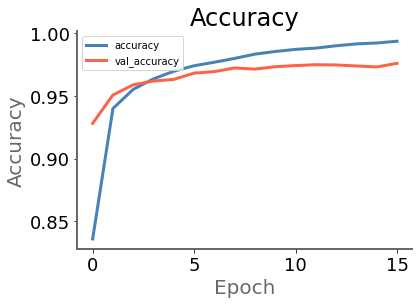

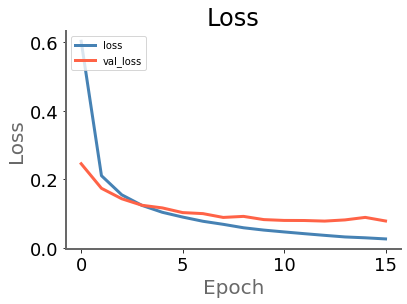

In [8]:
pwk.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

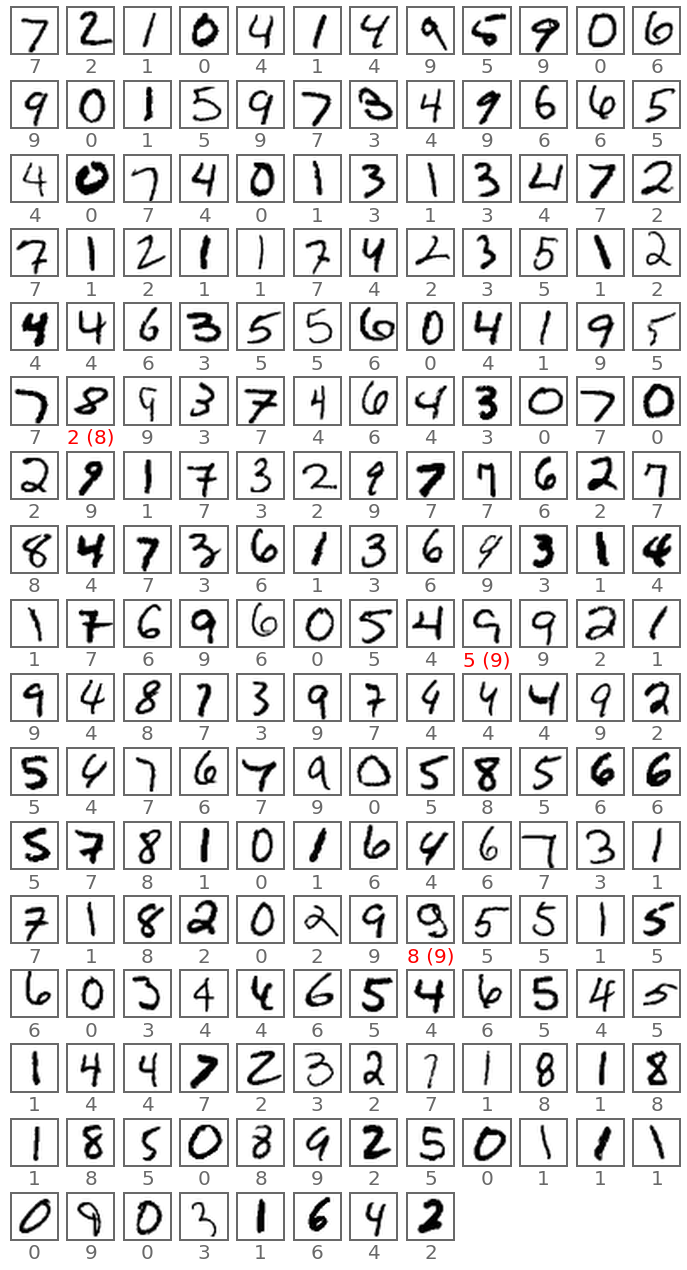

In [9]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

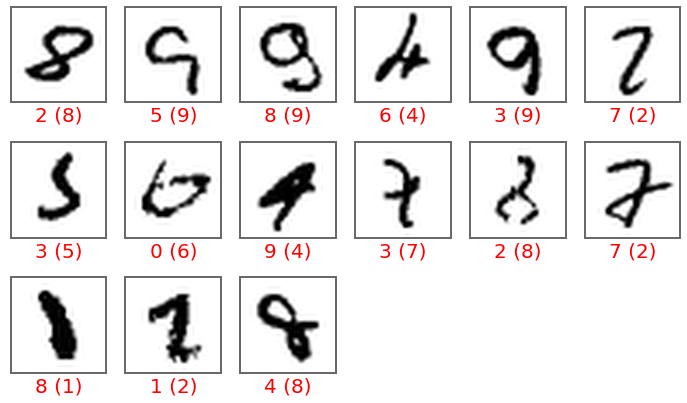

In [10]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

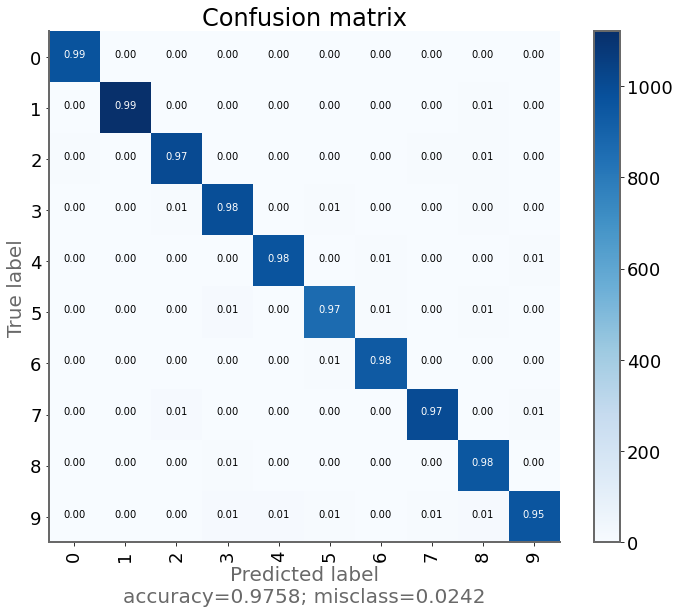

In [11]:
pwk.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [12]:
pwk.end()

End time is : Tuesday 26 January 2021, 16:12:02
Duration is : 00:00:36 338ms
This notebook ends here


<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>